# "Windows Store dataset Exploatory Data Analysis III"
> "Exploatory Data Analysis (EDA) on The Windows Store dataset from Kaggle: https://www.kaggle.com/vishnuvarthanrao/windows-store Part 3"
- toc: false
- badges: false


Hey everyone. With this final part of my analysis of the Windows Store dataset, I will be exploring seasonality patterns for the free apps. You can check out the previous part through the link down below:

https://www.kaggle.com/sanchitagarwal/windows-store-eda-2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates

In [2]:
#sql_server = "142.250.194.132"
#sql_user = "master"
#sql_pass = "admin"

#connection = pymssql.connect(sql_server, sql_user, sql_pass, "master")

#with connection:
#    with connection.cursor(as_dict = True) as cursor:
#        sql = "SELECT * FROM windows_store WHERE price = 0.0"
#        cursor.execute(sql)
#        result = cursor.fetchall()
#        free_app_df = pd.DataFrame(result)
        
apps_df = pd.read_csv("../input/windows-store/msft.csv")
apps_df["Price"].fillna(value = "Free", inplace = True)

free_app_df  = apps_df.loc[apps_df.Price == "Free"]
free_app_df["Date"] = pd.to_datetime(free_app_df["Date"])


free_app_df.head()       

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,2014-07-01,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-08-01,Free
2,BookViewer,3.5,593,Books,2016-02-29,Free
3,Brick Instructions,3.5,684,Books,2018-01-30,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,Free


In [3]:
free_app_df.describe()

,Rating,No of people Rated
count,5163.000000,5164.000000
mean,3.832946,552.030790
std,0.946165,259.551843
min,1.000000,100.000000
25%,3.500000,327.000000
50%,4.000000,548.500000
75%,4.500000,778.250000
max,5.000000,1000.000000


The average RATING for free apps performed hilarousily better than that of paid apps (3.83 > 2.47). This is even more surprising when considering the fact that the statistics for the NO_OF_PEOPLE for both the free apps and the paid apps are almost similar i.e an equal number of people have rated them. This by itself is an interesting question ? What's the reason for this particular column to be almost identical for both the stratas ?

In [4]:
free_app_df["Rating"].mode()

0    4.0
dtype: float64

Have you ever wanted to rate an app but don't feel like giving it a solid 5 ? But you don't want to look bad so you don't want to give it a 3 or lower. So what do you do ? Give it a 4 of course!

I wonder if my amatuer psychological deduction is the reason for such observation ?

In [5]:
free_app_df.Category.describe()

count      5163
unique       13
top       Music
freq        753
Name: Category, dtype: object

In [6]:
free_app_df["Category"].unique()

array(['Books', 'Business', 'Developer Tools', 'Social',
       'Food and Dining', 'Government and Politics', 'Health and Fitness',
       'Kids and Family', 'Lifestyle', 'Multimedia Design', 'Music',
       'Navigation and Maps', 'News and Weather', nan], dtype=object)

For free apps, we can see a phelotra of categories prevailing in the app market, with Music apps being the most popular. 

You know what! I would like to explore how differently each category of apps have been rated i.e lets found out the mean rating for each category of apps.

In [7]:
free_app_df[["Category", "Rating"]].groupby("Category").mean()

,Rating
Category,
Books,3.884793
Business,3.780702
Developer Tools,3.952222
Food and Dining,3.789157
Government and Politics,4.050000
Health and Fitness,3.785579
Kids and Family,3.947826
Lifestyle,3.850610
Multimedia Design,3.551282


Now that's surely a surprise ! The category with the highest rating is "Government and Politics", followed by not so surprisingly "Developer Tools" and "Kids and Family". Needless to say, none of the individual category's rating deviate significantly from the average rating of the free apps (3.83).

Now I shall be doing the same visualization tasks as I had done for the paid apps.

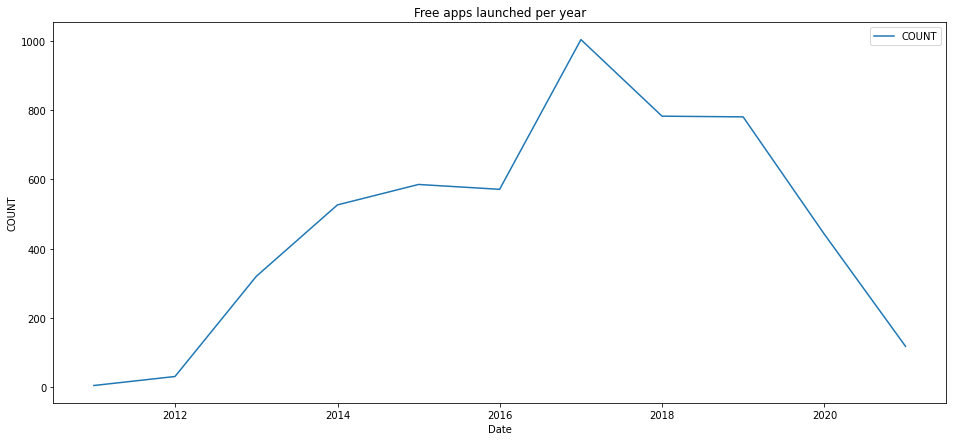

In [8]:
df_plot_count = free_app_df[["Rating", "Date"]].groupby(pd.Grouper(key="Date", freq="Y")).count()

plt.figure(figsize=(16,7))
plt.title("Free apps launched per year")


plot = sns.lineplot(data = df_plot_count)
plot.xaxis.set_major_formatter(dates.DateFormatter("%Y"))
plot.set(ylabel = "COUNT")
plot.legend(labels=["COUNT"])

plt.show()

Interesting indeed! The graph shows that the no of free apps launched peaked in 2017, after which it started to decline. Right now I can't think of anything which could be a precursor to it. If you can think of something then please let me know in the comments. 

Moving on...

Now I will be exploring seasonality trends for No of people who rated the apps and rating.

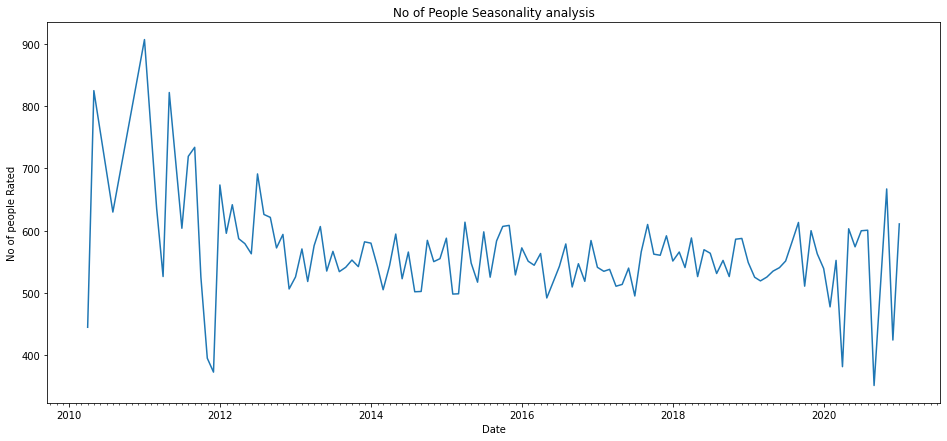

In [9]:
df_plot_data = free_app_df[["Date", "No of people Rated", "Rating"]]
df_plot_data.set_index("Date", inplace=True)

df_plot_data = df_plot_data.groupby(pd.Grouper(freq='M')).mean().dropna(how="all")
df_plot_data.sort_index(axis = 0)

plt.figure(figsize=(16,7))
plt.title("No of People Seasonality analysis")

plot = sns.lineplot(data=df_plot_data["No of people Rated"])
plot.xaxis.set_minor_locator(dates.MonthLocator())
#plot.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

plt.show()

This graph clearly shows that the no of people who have rated the free app started declining from 2012 onwards, with significant drops in the year of 2020. Generally, the range of people rating the app is averaging around 100. This could also indicate that any promotional campaign conducted by Microsoft to increase its app store visibility and to encourage people to rate the apps have not been quite successful.

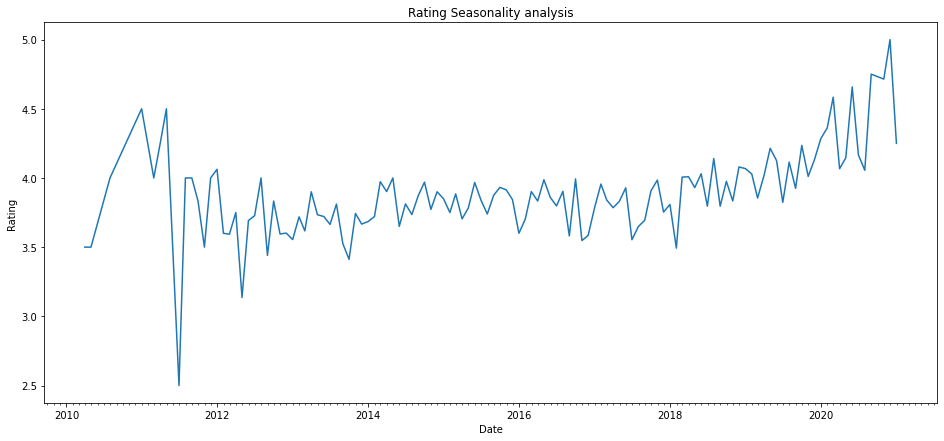

In [10]:
plt.figure(figsize=(16,7))
plt.title("Rating Seasonality analysis")

plot = sns.lineplot(data=df_plot_data["Rating"])
plot.xaxis.set_minor_locator(dates.MonthLocator())
#plot.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

plt.show()

On the other hand, the average Rating for free apps have started improving from 2018 onwards. This can be attributed to a key system update of the app store in 2018 which allowed Progressive Web Appilications (Basically app built through web technologies like HTML, CSS and Javascript). Its been documented that implementation of this technology resulted in improvement in KPIs such as average time spend on a page, conversion rate etc.

So with this I conclude my analysis of the Windows App Store dataset. I hope you guys like my work and please let me know your suggestions and feedback. See you then!